# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [180]:
!pip install networkx==2.5

  Attempting uninstall: networkx
    Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [2]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [3]:
edges = [tuple(x) for x in data.values.tolist()]

In [4]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [6]:
A = (B.subgraph(c) for c in nx.connected_components(B))
A = list(A)[0]

In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


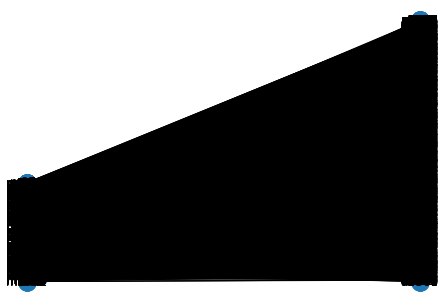

In [8]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)



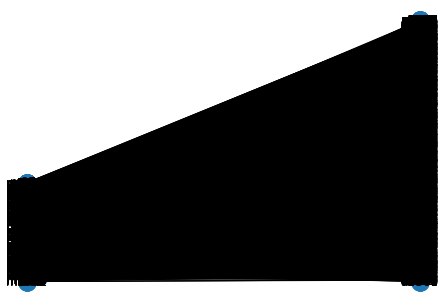

In [9]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [10]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [11]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [12]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [13]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

In [16]:
def get_class_indexes(class_list,class_name):
    class_indexes = []
    for i,item in enumerate(class_list):
        if(item == class_name):
            class_indexes.append(i)
    return class_indexes

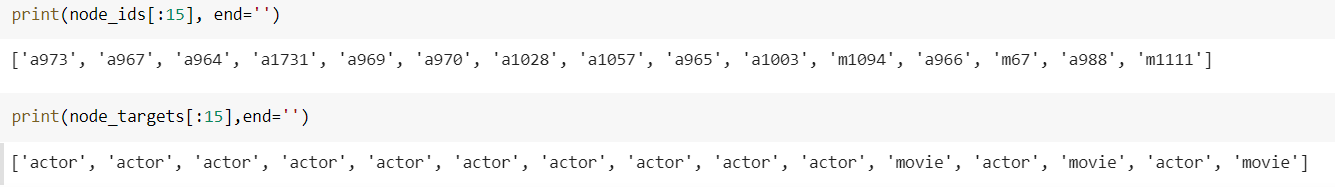

In [17]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_indexes = get_class_indexes(node_targets,'actor')
    movie_indexes = get_class_indexes(node_targets,'movie')
    actor_nodes,movie_nodes=[node_ids[index] for index in actor_indexes],[node_ids[index] for index in movie_indexes]
    actor_embeddings,movie_embeddings=[node_embeddings[index] for index in actor_indexes],[node_embeddings[index] for index in  movie_indexes]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [18]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [19]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [20]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [24]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    list_connected_componenets = nx.connected_components(graph)
    max_number_of_nodes = 0
    for connected_component in list_connected_componenets:
        if(max_number_of_nodes < len(connected_component)):
            max_number_of_nodes = len(connected_component)
    cost1= (1/number_of_clusters) * (max_number_of_nodes/graph.number_of_nodes()) 
    
    return cost1

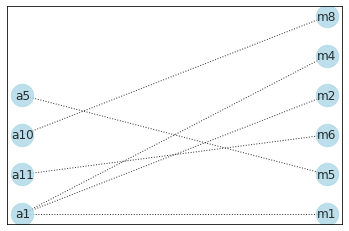

In [23]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [25]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [28]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    movie_nodes = 0
    for node in graph.nodes():
        if('m' in node):
            movie_nodes += 1 
    cost2= (1/number_of_clusters) * (graph.number_of_edges()/movie_nodes) 
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [29]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
def create_graph_actor(list_of_actor):
    class_graph = nx.Graph()
    for actor in list_of_actor:
        neighbours = nx.ego_graph(A,actor).nodes
        #print(sorted(neighbours))
        for node in neighbours:
            if('a' in node):
                class_graph.add_node(node,bipartite = 0)
            else:
                class_graph.add_node(node,bipartite = 1)
                class_graph.add_edge(actor,node)
    return class_graph
    

In [36]:
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
cost = []
for number_of_clusters in clusters:
    cluster = AgglomerativeClustering(n_clusters=number_of_clusters)
    cluster.fit(actor_embeddings)
    labels = set(cluster.labels_)
    sum_cost_1 = 0
    sum_cost_2 = 0
    for label in labels:
        #print("label:",label)
        list_of_indexes_label = np.where(cluster.labels_ == label)
        #print("number of actors:",len(list_of_indexes_label[0]))
        list_of_actors = []
        new_graph = nx.Graph()
        for i in list_of_indexes_label[0]:
            list_of_actors.append(actor_nodes[i])
        new_graph = create_graph_actor(list_of_actors)
        sum_cost_1 = sum_cost_1 + cost1(new_graph,number_of_clusters)
        sum_cost_2 = sum_cost_2 + cost2(new_graph,number_of_clusters)
    cost.append(sum_cost_1*sum_cost_2)
print("Cost : ", cost)
indexWithMaxCost = np.argmax(np.array(cost))
print("Index With Max. Cost:",indexWithMaxCost)

Cost :  [4.122345397942208, 3.008432879473436, 2.5657067065563326, 1.7913037566250993, 1.6299420992722642, 1.6901424208588813, 2.0101650207941457, 2.0943401249832316]
Index With Max. Cost: 0


<font color='blue'>Displaying similar actor clusters</font>

In [37]:
cluster = AgglomerativeClustering(n_clusters=clusters[indexWithMaxCost])
cluster.fit(actor_embeddings)
labels = cluster.labels_

In [38]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

3411


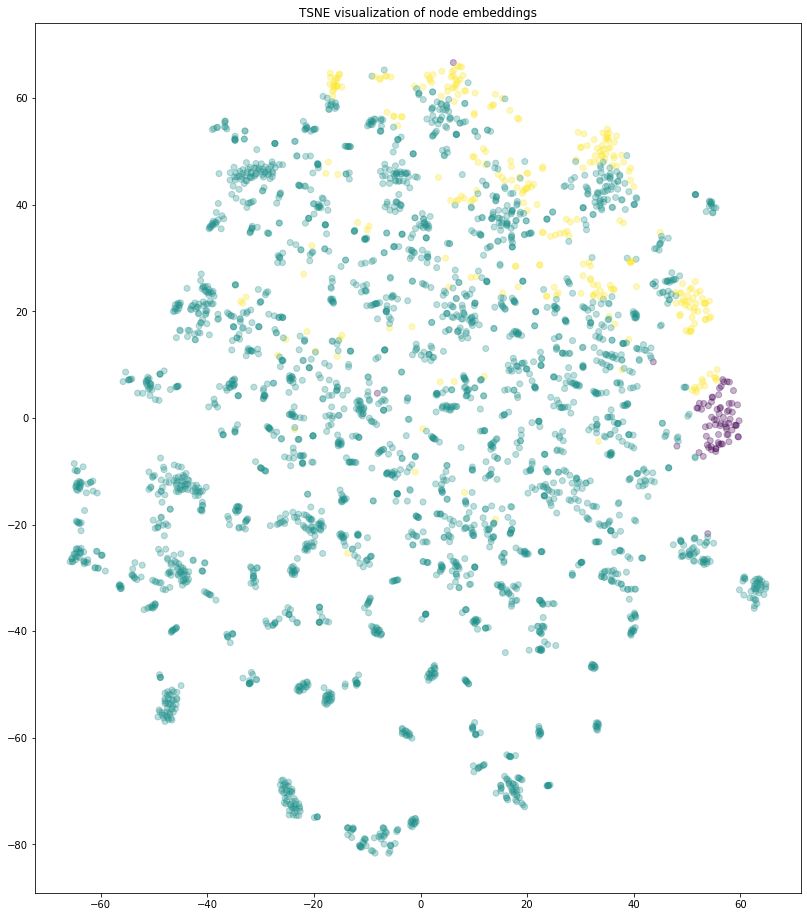

In [39]:
label_map = { l: i for i, l in enumerate(np.unique(labels))}
node_colours = [ label_map[label] for label in labels]
print(len(node_colours))
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [40]:
def cost2_movie(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    actor_nodes = 0
    for node in graph.nodes():
        if('a' in node):
            actor_nodes += 1 
    cost2= (1/number_of_clusters) * (graph.number_of_edges()/actor_nodes)
    return cost2

In [41]:
def create_graph_movie(list_of_movie):
    class_graph = nx.Graph()
    for movie in list_of_movie:
        neighbours = nx.ego_graph(A,movie).nodes
        #print(sorted(neighbours))
        for node in neighbours:
            if('m' in node):
                class_graph.add_node(node,bipartite = 0)
            else:
                class_graph.add_node(node,bipartite = 1)
                class_graph.add_edge(movie,node)
    return class_graph

In [42]:
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
cost = []
for number_of_clusters in clusters:
    cluster = AgglomerativeClustering(n_clusters=number_of_clusters)
    cluster.fit(movie_embeddings)
    labels = set(cluster.labels_)
    sum_cost_1 = 0
    sum_cost_2 = 0
    for label in labels:
        #print("label:",label)
        list_of_indexes_label = np.where(cluster.labels_ == label)
        #print("number of actors:",len(list_of_indexes_label[0]))
        list_of_movies = []
        new_graph = nx.Graph()
        for i in list_of_indexes_label[0]:
            list_of_movies.append(movie_nodes[i])
        new_graph = create_graph_movie(list_of_movies)
        sum_cost_1 = sum_cost_1 + cost1(new_graph,number_of_clusters)
        sum_cost_2 = sum_cost_2 + cost2_movie(new_graph,number_of_clusters)
    cost.append(sum_cost_1*sum_cost_2)
print("Cost : ", cost)
indexWithMaxCost = np.argmax(np.array(cost))
print("Index With Max. Cost:",indexWithMaxCost)

Cost :  [2.5336795517186883, 4.160506646339725, 3.413033556765582, 2.114970292896551, 1.8911150653748596, 1.6217615492038508, 1.39504519517285, 1.243467601426709]
Index With Max. Cost: 1


<font color='blue'>Displaying similar movie clusters</font>

In [43]:
cluster = AgglomerativeClustering(n_clusters=clusters[indexWithMaxCost])
cluster.fit(movie_embeddings)
labels = cluster.labels_

In [44]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

1292


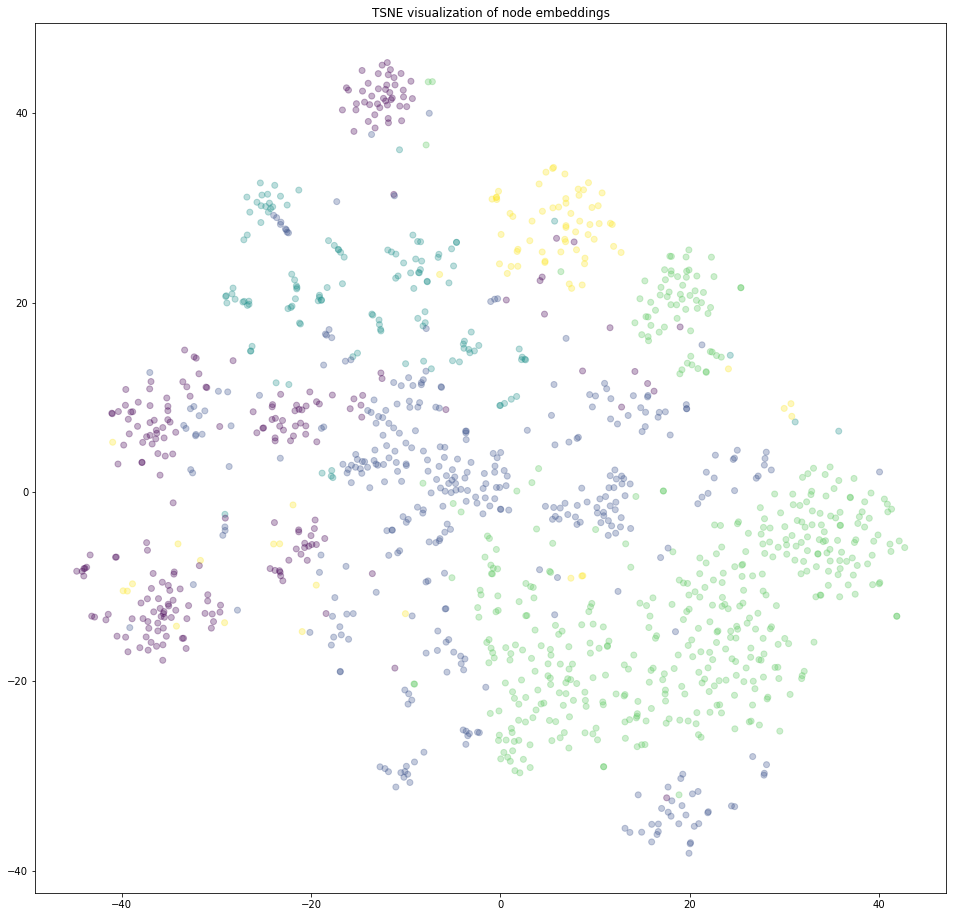

In [45]:
label_map = { l: i for i, l in enumerate(np.unique(labels))}
node_colours = [ label_map[label] for label in labels]
print(len(node_colours))
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()